In [11]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten

In [ ]:
X_train = np.loadtxt('C:\\Users\\hp\\BInternz\\Image Classification CNN Keras Dataset-20240125T151634Z-001\\Image Classification CNN Keras Dataset\\input.csv', delimiter=',')
Y_train = np.loadtxt('C:\\Users\\hp\\BInternz\\Image Classification CNN Keras Dataset-20240125T151634Z-001\\Image Classification CNN Keras Dataset\\labels.csv', delimiter=',')

X_test = np.loadtxt('C:\\Users\\hp\\BInternz\\Image Classification CNN Keras Dataset-20240125T151634Z-001\\Image Classification CNN Keras Dataset\\input_test.csv', delimiter=',')
Y_test = np.loadtxt('C:\\Users\\hp\\BInternz\\Image Classification CNN Keras Dataset-20240125T151634Z-001\\Image Classification CNN Keras Dataset\\labels_test.csv', delimiter=',')


In [ ]:
X_train = X_train.reshape(len(X_train),100,100,3)
Y_train = Y_train.reshape(len(Y_train),1)

X_test = X_test.reshape(len(X_test),100,100,3)
Y_test = Y_test.reshape(len(Y_test),1)

X_train = X_train/255.0
X_test = X_test/255.0

In [4]:
print("Shape of X_train: ",X_train.shape)
print("Shape of Y_train: ",Y_train.shape)
print("Shape of X_test: ",X_test.shape)
print("Shape of Y_test: ",Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


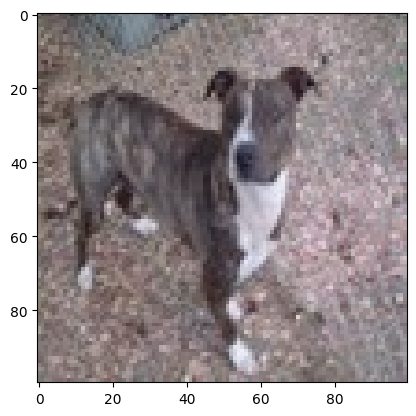

In [5]:
idx = random.randint(0,len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

In [6]:
model = Sequential([
    Conv2D(32,(3,3), activation = 'relu', input_shape = (100,100,3)),
    MaxPooling2D((2,2)),

    Conv2D(32,(3,3), activation = 'relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')  # activation function 'sigmoid' is used for binary classification
])

In [7]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [8]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)

Epoch 1/5


32/32 [==============================] - 5s 110ms/step - loss: 0.7139 - accuracy: 0.4990
Epoch 2/5
32/32 [==============================] - 3s 106ms/step - loss: 0.6847 - accuracy: 0.5675
Epoch 3/5
32/32 [==============================] - 3s 107ms/step - loss: 0.6372 - accuracy: 0.6435
Epoch 4/5
32/32 [==============================] - 3s 107ms/step - loss: 0.5835 - accuracy: 0.6965
Epoch 5/5
32/32 [==============================] - 3s 106ms/step - loss: 0.5089 - accuracy: 0.7490


In [ ]:
model.evaluate(X_test, Y_test)


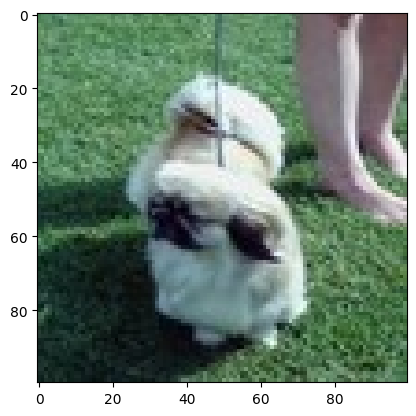

1/1 [==============================] - 0s 190ms/step
[[0.48554787]]
Our model says it is a: dog


In [10]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
print(y_pred)

y_pred = y_pred > 0.5
if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'

print("Our model says it is a:",pred)